In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Let's first create a helper function to help convert the data from mpg (miles per gallon) to km/l (kilometers per liter). This will be used at a later step.

In [2]:
def mpg_to_kml(mpg):
    """Helper function to convert mpg to km/l"""
    return mpg * 0.42514

Using the pandas module, we can load the csv data into a pandas DataFrame. A DataFrame is an object that contains our data and provides several methods to help with data extraction, transformation, and loading. 
One such method is 'heads()', that shows the head of the dataframe. By default it shows the first 5 rows, but the desired number of rows can be passed as argument. It is useful to get a quick overview of the type of data we will deal with.

In [3]:
##################################################
# LOAD DATA WITH PANDAS
##################################################
# Data from: https://www.fueleconomy.gov/

# Load fuel economy data from csv file into a Pandas dataframe
df = pd.read_csv('all_alpha_19.csv', header='infer')
df.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2
0,ACURA ILX,2.4,4.0,AMS-8,2WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,KHNXV02.4KH3,small car,3,24,34,28,6,No,316
1,ACURA ILX,2.4,4.0,AMS-8,2WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,KHNXV02.4KH3,small car,3,24,34,28,6,No,316
2,ACURA MDX,3.0,6.0,AMS-7,4WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,KHNXV03.0AH3,small SUV,3,26,27,27,6,No,330
3,ACURA MDX,3.0,6.0,AMS-7,4WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,KHNXV03.0AH3,small SUV,3,26,27,27,6,No,330
4,ACURA MDX,3.5,6.0,SemiAuto-9,2WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,KHNXV03.5PH3,small SUV,3,20,27,23,5,No,387


In the next few steps we reduce the data to the subset that we need for our purposes, and transform it using the helper function we created earlier.

In [4]:
# Keep only data relative to "Federal Tier 3 Bin 125" standard for Gas and Diesel cars
df = df.query("Stnd == 'T3B125' & (Fuel == 'Gasoline' | Fuel == 'Diesel')")

# Keep only meaningful columns and create a new dataframe
# 'Model': Car manufacturer and model
# 'Displ': Engine displacement (size of engine)
# 'Fuel': Type of fuel
# 'City MPG': Number of miles the car gets per gallon of fuel in the city
# 'Hwy MPG': Number of miles the car gets per gallon of fuel on the highway
# 'Cmb MPG': Combined number of miles the car gets per gallon of fuel in the city and highway
# 'Greenhouse Gas Score': Calculated score indicating the car’s efficiency (higher is better)
cols = ['Model', 'Displ', 'Fuel', 'City MPG', 'Hwy MPG', 'Cmb MPG', 'Greenhouse Gas Score']
df = df[cols].reset_index(drop=True) #Drop the index column of the old dataframe

# Convert consumption data to float type
df = df.astype({'City MPG': float, 'Hwy MPG': float, 'Cmb MPG': float})

# Convert mpg to km/l
df = df.assign(CityKML = mpg_to_kml(df['City MPG']))
df = df.assign(HwyKML = mpg_to_kml(df['Hwy MPG']))
df = df.assign(CmbKML = mpg_to_kml(df['Cmb MPG']))

## Optional: Save reduced dataframe to csv (in case it's needed for later use)
#df.to_csv('car_data.csv')

df.head()

,Model,Displ,Fuel,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,CityKML,HwyKML,CmbKML
0,ACURA ILX,2.4,Gasoline,24.0,34.0,28.0,6,10.20336,14.45476,11.90392
1,ACURA MDX,3.0,Gasoline,26.0,27.0,27.0,6,11.05364,11.47878,11.47878
2,ACURA MDX,3.5,Gasoline,20.0,27.0,23.0,5,8.50280,11.47878,9.77822
3,ACURA MDX,3.5,Gasoline,19.0,26.0,22.0,4,8.07766,11.05364,9.35308
4,ACURA MDX A-spec,3.5,Gasoline,19.0,25.0,21.0,4,8.07766,10.62850,8.92794


A quick way to visualize if there is some relationship between two features is to create a scatterplot. In this case, we want to check if the engine displacement is somehow related to fuel consumption. Our intuition says so, but we want to confirm with data.

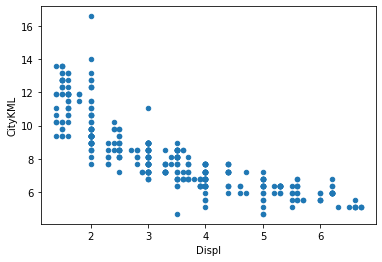

In [5]:
################################################
# Visualize the data
################################################

# df = pd.read_csv('car_data.csv', header='infer', index_col=0)

# Basic scatter plot of engine displacement vs city km/l
df.plot(kind='scatter', x='Displ', y='CityKML')
plt.show()

Looking at the plot above we can tell there is a defined general trend that confirms our intuition. In general, the bigger the engine size the less amount of kilometers we can drive with a liter of fuel. 
The plot above uses the base settings for the scatter plot. In the next steps, we can see how to make the plot more compelling to show more data in the same plot. 
For example, we can color the datapoints in different way based on the fuel type (gas or diesel), and change the size of the dots based on a different metric of interest (greenhouse gas score in this case). 

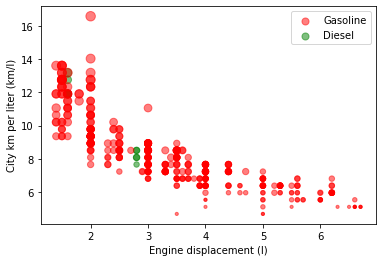

In [6]:
# Improve the graph for better data insights

c = ['r' if fuel  == 'Gasoline' else 'g' for fuel in df['Fuel'].to_list()] # color: red if gas, green if diesel
s = df['Greenhouse Gas Score'] * 10 # size proportional to greenhous gas score

plt.scatter(x=[], y=[], c='r', s=50, alpha=0.5, label='Gasoline') # empty entry for legend (red marker)
plt.scatter(x=[], y=[], c='g', s=50, alpha=0.5, label='Diesel') # empty entry for legend (green marker)
plt.scatter(x=df['Displ'], y=df['CityKML'], c=c, s=s, alpha=0.5)
plt.xlabel('Engine displacement (l)')
plt.ylabel('City km per liter (km/l)')
plt.legend()
plt.show()

Much prettier! And in the same real estate size we can provide much more insight into our data. 

Next, we explain how to create a simple pie chart. This type of chart is useful to show the relative distribution of a particular feature of our data set. In this case we can easily see that the majority of cars with 2.0 liters engine have greenhouse gas score of 5. There are other ways to convey the same information. This is of course just one of them.

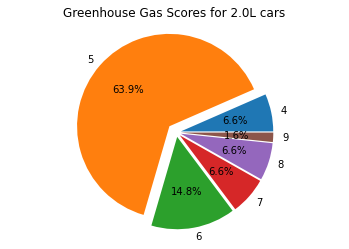

In [7]:
# Create pie chart for greenhouse gas score for 2.0l engine cars

df2 = df.query("Displ == 2.0") # select only cars with 2.0L engine
s1 = df2.groupby('Greenhouse Gas Score').size() # group by Greenhouse gas score and return the count 
explode = 0.05 + 0.05 * (s1 == max(s1)) # explode the biggest category a little away

fig1, ax1 = plt.subplots()
ax1.pie(s1, explode=explode, labels=list(s1.index), autopct='%1.1f%%',
        shadow=False, startangle= 0, rotatelabels=False)
ax1.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
 
plt.title('Greenhouse Gas Scores for 2.0L cars')
plt.show()
